<h1 align="center"><font size="5" >Manipulation of second hand vehicles data</font></h1>

In this project we will manipulate data that we gathered by the web scraping:
* In the first part, we will clearing data and convert it to numerical form
* In the second part, we will check the price correlation with other features
* In the third part, we will analyze the data and plotting some features and distribution
* In the last part, we will try to build a model to predict the price by linear regression and deep learning algorithm

For more data about the web scraping project, you can see the link below 
\
[**Web scraping of LaCentral.fr**](https://github.com/bouz1/web_scraping/blob/main/Web_scaping_V3.ipynb)

### Table of contents
1. [Preparing data](#title1)
    1. [Preparing data](#subtitle11)
    2. [Database reading ](#subtitle12)
    3. [Converting text columns to number columns ](#subtitle13)
2. [Price correlation with other parameters](#title2)
3. [Data analysis](#title3)
    1. [Time distribution](#subtitle31)
    2. [Geographic distribution](#subtitle32)
    3. [Outliers in data](#subtitle33)
4. [Price estimation](#title4)
    1. [Train/test/dev set preparation ](#subtitle41)
    2. [Price estimation, linear & polynomial regression](#subtitle42)
    3. [Price estimation, Neural Network](#subtitle43)




# I. Preparing data <a name="title1"></a>

## A. Importing the necessary libraries <a name="subtitle11"></a>


you can install any PIP library by the syntax below
\
!pip install Library
\
Example: **!pip install pandas**

In [1]:
#!pip install nbconvert
#!pip install geopandas
#!pip install scikit-learn
# ...

In [2]:
########### usual data libraries #################
import numpy as np
import pandas as pd
import warnings
import datetime
from pandasql import sqldf
########### Ploting libraries ####################
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
########### Machine learning libraries ############
from sklearn.preprocessing import PolynomialFeatures
import sklearn
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf

**Ignore all warnings**

In [3]:
warnings.filterwarnings('ignore')

## B. Database reading <a name="subtitle12"></a>

Read the database that we alrady contruised by weeb scaping of the website [**Lecentral**](www.lacentral.fr)
\
See this [project](-https://github.com/bouz1/web_scraping/blob/main/Web_scaping_V3.ipynb) for more details

You can download the dataseet zip file in the [**link**](https://github.com/bouz1/web_scraping/blob/main/datasets/lecentral_raspberry_database.zip) 

In [4]:
df = pd.read_csv('lecentral_raspberry_database.zip',sep=";")
len_df=len(df)
print('number of rows in the database is',len_df)

number of rows in the database is 149240


**Eliminate duplicate vehicles**
<br>
We start by the column 3 because column 0/ 1 /2 are not duplicated even with the same vehicle

In [5]:
df=df.drop_duplicates(subset=df.columns[3:], keep='first')
len_df2=len(df)
print('number of rows in the database without doubling is',len_df2)
print(100*len_df2/len_df,'% of rows is not duplicated')

number of rows in the database without doubling is 141248
94.64486732779416 % of rows is not duplicated


**Show the 3 first rows of the dataframe**

In [6]:
df.head(3)

,Unnamed: 0,page,href,model,version,price,dep,prof,warranty,year,...,Puissance moteur :,Prime à la conversion? :,Autonomie constructeur? :,Capacité batterie :,Intensité batterie :,Rechargeable :,Voltage batterie :,Conso. batterie :,Prix inclut la batterie :,Prix inclut la batterie? :
0,0,1,https://www.lacentrale.fr/auto-occasion-annonc...,HYUNDAI I20 (3E GENERATION),III 1.0 T-GDI 100 ACTIVE,16 340 €,17,Professionnel,Garantie 12 mois,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,https://www.lacentrale.fr/auto-occasion-annonc...,RENAULT MEGANE 4,IV 1.2 TCE 130 ENERGY INTENS,16 110 €,75,Professionnel,Garantie 12 mois,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,https://www.lacentrale.fr/auto-occasion-annonc...,PEUGEOT 2008,(2) 1.6 BLUEHDI 100 S&S ALLURE BUSINESS,17 720 €,76,Professionnel,Garantie 12 mois,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Show the type of each columns of the df**

In [7]:
df.dtypes

Unnamed: 0                          int64
page                                int64
href                               object
model                              object
version                            object
price                              object
dep                                 int64
prof                               object
warranty                           object
year                                int64
km                                 object
Année :                             int64
Boîte de vitesse :                 object
Contrôle technique? :              object
Couleur extérieure :               object
Crit'Air? :                       float64
Garantie :                         object
Kilométrage compteur? :            object
Longueur                           object
Mise en circulation :              object
Nb_option                         float64
Nombre de places :                float64
Nombre de portes :                float64
Norme Euro? :                     

**copy the df in a new df2**

In [8]:
df2=df.copy()

## 3. Convert text to number and clean data

**convert price text string to a number and show before and after**

In [9]:
df2['price']=df2['price'].str.replace('€','').\
str.replace(u'\xa0','').astype("int32")

In [10]:
pd.concat([df.price, df2.price], axis=1).head(3)

,price,price
0,16 340 €,16340
1,16 110 €,16110
2,17 720 €,17720


**convert km text string to a number and show before and after**

In [11]:
df2.km=df2.km.str.replace('km','').str.replace(u'\xa0','').astype("int32")

In [12]:
pd.concat([df.km, df2.km], axis=1).head(3)

,km,km
0,47 981 km,47981
1,104 063 km,104063
2,108 405 km,108405


**Convert first circulation date from text string to a date**

In [13]:
df2['circuilation_date']=pd.to_datetime(df2['Mise en circulation : '],\
                                        format= "%d/%m/%Y")

**Split model to model1 & model2 and show before and after**

In [14]:
df2[['model1','model2']]=df2['model'].str.split(' ',1,expand=True).astype(str)

In [15]:
df2[['model','model1','model2']].head(4)

,model,model1,model2
0,HYUNDAI I20 (3E GENERATION),HYUNDAI,I20 (3E GENERATION)
1,RENAULT MEGANE 4,RENAULT,MEGANE 4
2,PEUGEOT 2008,PEUGEOT,2008
3,PEUGEOT 208 (2E GENERATION),PEUGEOT,208 (2E GENERATION)


**Convert horsepower from text string to a date**

In [16]:
df2['HorseP']=df2['Puissance din : '].str.replace('ch','').astype("Int32") #I to avoide NAN float 

In [17]:
pd.concat([df2['Puissance din : '],df2['HorseP']], axis=1).head(3)

,Puissance din :,HorseP
0,100 ch,100
1,132 ch,132
2,99 ch,99


**convert Tax horsepower from text string to a number and show before and after**
\
for more details about Tax horsepower please see the wikipedia [link](https://en.wikipedia.org/wiki/Tax_horsepower)

In [18]:
df2['CV_fisc']=df2['Puissance fiscale : '].str.replace('CV','').astype("Int32") #I to avoide NAN float 

In [19]:
pd.concat([df2['Puissance fiscale : '],df2['CV_fisc']], axis=1).head(3)

,Puissance fiscale :,CV_fisc
0,5 CV,5
1,7 CV,7
2,5 CV,5


**convert days after publication text string to a number and show before and after**

In [20]:
df2['days_after_pub']=df2['publication'].str.replace('Publié depuis :','').str.replace('jours','').str.replace('jour','').astype("Int32")

In [21]:
df2[['publication','days_after_pub']].head(3)

,publication,days_after_pub
0,Publié depuis : 60 jours,60
1,Publié depuis : 23 jours,23
2,Publié depuis : 27 jours,27


**Convert fuel from object to string**

In [22]:
df2['fuel']=df2['Énergie : '].astype({'Énergie : ':'string'})

In [23]:
print(df2['Énergie : '].dtype,' _________ ',df2['fuel'].dtype)

object  _________  string


**Convert Warranty month text string to a number and show before and after**

In [24]:
df2['warranty_month']=df2['warranty'].str.replace('Garantie','').\
str.replace('mois','').str.replace('constructeur','36').astype('Int32')

In [25]:
pd.concat([df2['warranty'],df2['warranty_month']], axis=1).head(3)

,warranty,warranty_month
0,Garantie 12 mois,12
1,Garantie 12 mois,12
2,Garantie 12 mois,12


**Convert technical control from text string to a number (1 if isn't needed, 0 if is needed) and show before and after**

In [26]:
df2['CT']=df2['Contrôle technique? : '].str.replace('non requis','1').str.replace( 'requis','0').astype('Int32')

In [27]:
pd.concat([df2['Contrôle technique? : '],df2['CT']], axis=1).head(4)

,Contrôle technique? :,CT
0,non requis,1
1,requis,0
2,non requis,1
3,non requis,1


**From object to float**

In [28]:
df2['doors_nb']=df2['Nombre de portes : '].astype('float32')

**Convert Europe standard from text string to a number and show before and after**

In [29]:
df2['Euro_stand']=df2['Norme Euro? : '].str.replace('EURO','')

In [30]:
df2[['Norme Euro? : ','Euro_stand']].head(3)

,Norme Euro? :,Euro_stand
0,EURO6,6
1,EURO6,6
2,EURO6,6


**Convert fuel consumption from text string to a number and show before and after**

In [31]:
df2['L_by_100km']=df2['Consommation mixte? : '].str.replace(' l/100km','').astype("float")

In [32]:
df2[['Consommation mixte? : ','L_by_100km']].head(3)

,Consommation mixte? :,L_by_100km
0,NaN,NaN
1,4.5 l/100km,4.5
2,3.3 l/100km,3.3


**Convert gearbox type from text string to a number and show before and after**

In [33]:
df2['Gearbox_auto']=df2['Boîte de vitesse : '].replace({'automatique':1,'mécanique':0})

In [34]:
df2[['Boîte de vitesse : ','Gearbox_auto']].head(3)

,Boîte de vitesse :,Gearbox_auto
0,mécanique,0
1,mécanique,0
2,mécanique,0


**From object to float**

In [35]:
df2['numbe_seats']=df2['Nombre de places : '].astype("float")

**Convert the status of first hande of the vehicle from text string to a number and show before and after**

In [36]:
df2['first_hand']=df2['Première main (déclaratif)? : '].replace({'oui':1,'non':0})

In [37]:
df2[['Première main (déclaratif)? : ','first_hand']].head(3)

,Première main (déclaratif)? :,first_hand
0,non,0
1,non,0
2,oui,1


**Convert the trunk volume from text string to a number and show before and after**

In [38]:
df2['trunk_volume']=df2['Volume du coffre '].str.replace('L','').astype("float")

In [39]:
df2[['Volume du coffre ','trunk_volume']].head(3)

,Volume du coffre,trunk_volume
0,326 L,326.0
1,384 L,384.0
2,410 L,410.0


In [40]:
df2['CO2_g_km']=df2['Émissions de CO2? : '].str.split('g/km',1,expand=True)[0].astype(float)

In [41]:
df2[['Émissions de CO2? : ','CO2_g_km']].head(3)

,Émissions de CO2? :,CO2_g_km
0,NaN,NaN
1,119 g/kmB,119.0
2,90 g/kmA,90.0


In [42]:
df2["Crit_Air"]=df2["Crit'Air? : "]

**Calcul number of day since the first circulation of the vehicle**

In [43]:

today=datetime.date(2022, 11, 19)# I chose this date to find repeatability, otherwise you can choose the function date.today()

In [44]:
df2['circuilation_days']=(today-df2['circuilation_date'].map(datetime.datetime.date)).dt.days

In [45]:
df2[['circuilation_date','circuilation_days']].head(3)

,circuilation_date,circuilation_days
0,2021-07-08,499
1,2017-07-07,1961
2,2019-05-29,1270


**Convert the length from text string to a number and show before and after**

In [46]:
df2['Length']=df2['Longueur '].str.replace(' m','')
df2[['Longueur ','Length']].head(3)

,Longueur,Length
0,4.07 m,4.07
1,4.36 m,4.36
2,4.16 m,4.16


**take the organized data and delete df2**

In [47]:
df3=df2[['model1','model2','version','price','km','fuel','days_after_pub','CV_fisc',
         'HorseP','dep','warranty_month','CT',"Crit_Air",'Gearbox_auto','L_by_100km',
         'numbe_seats','doors_nb','Euro_stand','first_hand','CO2_g_km','trunk_volume',
         'year','circuilation_days','Length','Nb_option','circuilation_date']]

In [48]:
del (df2)

After inspecting the database, I find that the year and the circulation date was increased by exactly one year. I didn't yeat understand why, but I propose de reduce this year

In [49]:
df3.year-=1
df3.circuilation_days+=365

**Extract month column**

In [50]:
df3.circuilation_date=df3.circuilation_date.astype('datetime64[ns]')

In [51]:
df3['month']=df3['circuilation_date'].dt.month.astype('Int8')

**Using SQL to add a column to the dataFrame df3 with name of each departement**

adding index as a column, this will help to sort the dataFrame after sql joining

In [52]:
df3['ID_index']=df3.index 

**Show some columns with ID_index column**

In [53]:
df3[['model1','km','ID_index']].head(3)

,model1,km,ID_index
0,HYUNDAI,47981,0
1,RENAULT,104063,1
2,PEUGEOT,108405,2


**Load department names file**
<br>
You can donwload this file in the below link
<br>
https://www.data.gouv.fr/en/datasets/departements-et-leurs-regions/

In [54]:
dep_name=pd.read_csv('departements-region.csv')

Replace the departments 2A/2B (Corse) with 200/201: this allows us to convert the department number to integer

In [55]:
dep_name.num_dep[dep_name.num_dep=='2A']='200'
dep_name.num_dep[dep_name.num_dep=='2B']='201'
dep_name.num_dep=dep_name.num_dep.astype('Int16')

**Add a column that grouping the department number and its name**

In [56]:
dep_name['dep_name_nb']=dep_name.num_dep.astype('str')+' '+dep_name.dep_name

In [57]:
dep_name.head(3)

,num_dep,dep_name,region_name,dep_name_nb
0,1,Ain,Auvergne-Rhône-Alpes,1 Ain
1,2,Aisne,Hauts-de-France,2 Aisne
2,3,Allier,Auvergne-Rhône-Alpes,3 Allier


**Join df3 and dep_name, the goal is to add a column with departement name 'dep_name_nb'**

In [58]:
df3['ID_index']=df3.index
q="""
SELECT df3.*,dep_name.dep_name_nb AS dep_name
FROM df3 JOIN dep_name ON df3.dep=dep_name.num_dep
ORDER BY ID_index
"""
df3=sqldf(q)

**Show some columns with dep_name column**

In [59]:
df3[['model1','km','ID_index','dep','dep_name','dep_name']].head(3)

,model1,km,ID_index,dep,dep_name,dep_name
0,HYUNDAI,47981,0,17,17 Charente-Maritime,17 Charente-Maritime
1,RENAULT,104063,1,75,75 Paris,75 Paris
2,PEUGEOT,108405,2,76,76 Seine-Maritime,76 Seine-Maritime


**Show few rows of the df3**

In [60]:
df3.head(3)

,model1,model2,version,price,km,fuel,days_after_pub,CV_fisc,HorseP,dep,...,CO2_g_km,trunk_volume,year,circuilation_days,Length,Nb_option,circuilation_date,month,ID_index,dep_name
0,HYUNDAI,I20 (3E GENERATION),III 1.0 T-GDI 100 ACTIVE,16340,47981,Essence,60,5.0,100.0,17,...,NaN,326.0,2018,864,4.07,15.0,2021-07-08 00:00:00.000000,7,0,17 Charente-Maritime
1,RENAULT,MEGANE 4,IV 1.2 TCE 130 ENERGY INTENS,16110,104063,Essence,23,7.0,132.0,75,...,119.0,384.0,2016,2326,4.36,44.0,2017-07-07 00:00:00.000000,7,1,75 Paris
2,PEUGEOT,2008,(2) 1.6 BLUEHDI 100 S&S ALLURE BUSINESS,17720,108405,Diesel,27,5.0,99.0,76,...,90.0,410.0,2016,1635,4.16,33.0,2019-05-29 00:00:00.000000,5,2,76 Seine-Maritime


**Save df3 in paquet format, this can help if we want to start code from this line**
<br>
For your information, parquet format is best than csv, it conserve the data type, and take less place in the memory

In [61]:
df3.to_parquet('df3.parquet.gzip',compression='gzip') 

## C. Converting text columns to number columns  <a name="subtitle13"></a>

**Preparing dictionary of fuel column**

In [62]:
l1=list(set(df3['fuel']))
l2=list(range(len(l1)))
l2=map(str, l2) # this line convert the integer list to a string list 
dic_fuel1=dict(zip(l1, l2))

**Preparing dictionary of model1 column**

In [63]:
l1=list(set(df3['model1']))
l2=list(range(len(l1)))
l2=map(str, l2)
dic_model1=dict(zip(l1, l2))

**Preparing dictionary of model2 column**

In [64]:
l1=list(set(df3['model2']))
l2=list(range(len(l1)))
l2=map(str, l2)
dic_model2=dict(zip(l1, l2))

**Preparing dictionary of version column**

In [65]:
l1=list(set(df3.version))
l2=list(range(len(l1)))
l2=map(str, l2)
dic_version=dict(zip(l1, l2))

**Replacing the string columns in df3**

In [66]:
df3_=df3.replace({"fuel": dic_fuel1,'model1': dic_model1,\
                  'model2': dic_model2,'version': dic_version})

**drop departement name column and convert all columns to float**

In [67]:
df3_=df3_.drop(columns='dep_name')

In [68]:
df3_=df3_.drop(columns='circuilation_date')
df3_=df3_.astype(float)

In [69]:
df3_.dtypes

model1               float64
model2               float64
version              float64
price                float64
km                   float64
fuel                 float64
days_after_pub       float64
CV_fisc              float64
HorseP               float64
dep                  float64
warranty_month       float64
CT                   float64
Crit_Air             float64
Gearbox_auto         float64
L_by_100km           float64
numbe_seats          float64
doors_nb             float64
Euro_stand           float64
first_hand           float64
CO2_g_km             float64
trunk_volume         float64
year                 float64
circuilation_days    float64
Length               float64
Nb_option            float64
month                float64
ID_index             float64
dtype: object

In [70]:
df3_.head(3)

,model1,model2,version,price,km,fuel,days_after_pub,CV_fisc,HorseP,dep,...,Euro_stand,first_hand,CO2_g_km,trunk_volume,year,circuilation_days,Length,Nb_option,month,ID_index
0,24.0,427.0,7114.0,16340.0,47981.0,7.0,60.0,5.0,100.0,17.0,...,6.0,0.0,NaN,326.0,2018.0,864.0,4.07,15.0,7.0,0.0
1,52.0,772.0,4805.0,16110.0,104063.0,7.0,23.0,7.0,132.0,75.0,...,6.0,0.0,119.0,384.0,2016.0,2326.0,4.36,44.0,7.0,1.0
2,0.0,718.0,173.0,17720.0,108405.0,6.0,27.0,5.0,99.0,76.0,...,6.0,1.0,90.0,410.0,2016.0,1635.0,4.16,33.0,5.0,2.0


**Save df3_ in paquet format, this can help if we want to start code from this line**

In [71]:
df3_.to_parquet('df3_.parquet.gzip',compression='gzip') 

# II. Price correlation with other parameters <a name="title2"></a>

**Plot the diagonal correlation of all df3_ columns**

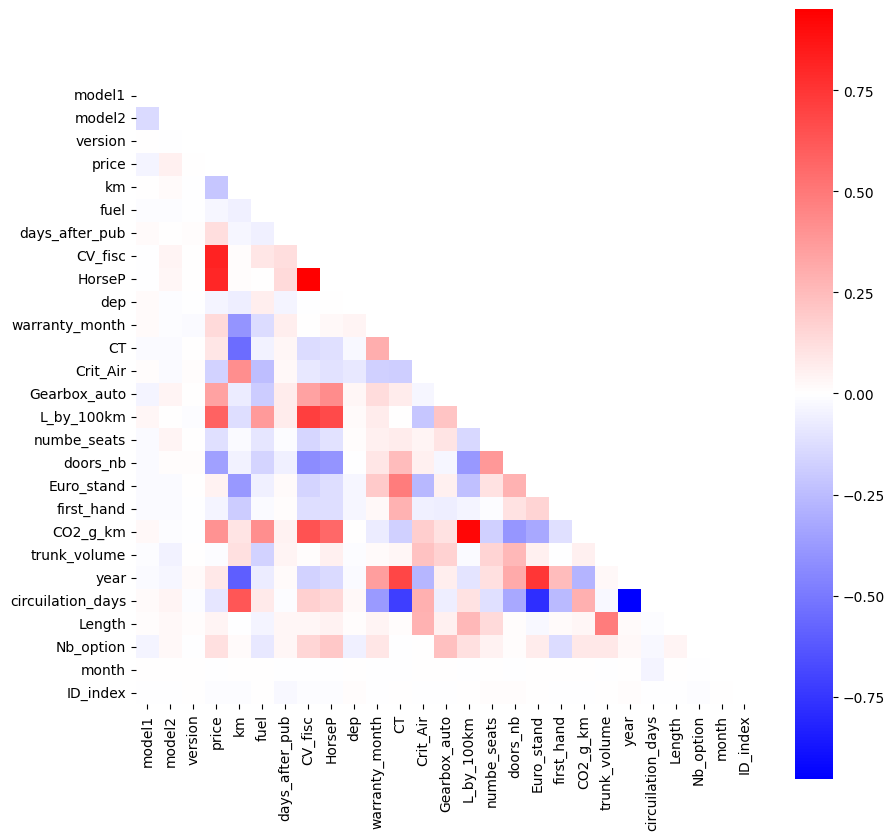

In [72]:
cor=df3_.corr()

mask = np.triu(np.ones_like(cor))# this mask allow us to print a half of rectangle

plt.figure(figsize=(10,10))
sns.heatmap(data=cor,square=True,cmap='bwr', mask=mask)#
plt.yticks(rotation=0)
plt.xticks(rotation=90)
pass # this is used just to not print the name of the plot

**Plot only the correlation of the price depending on other columns**

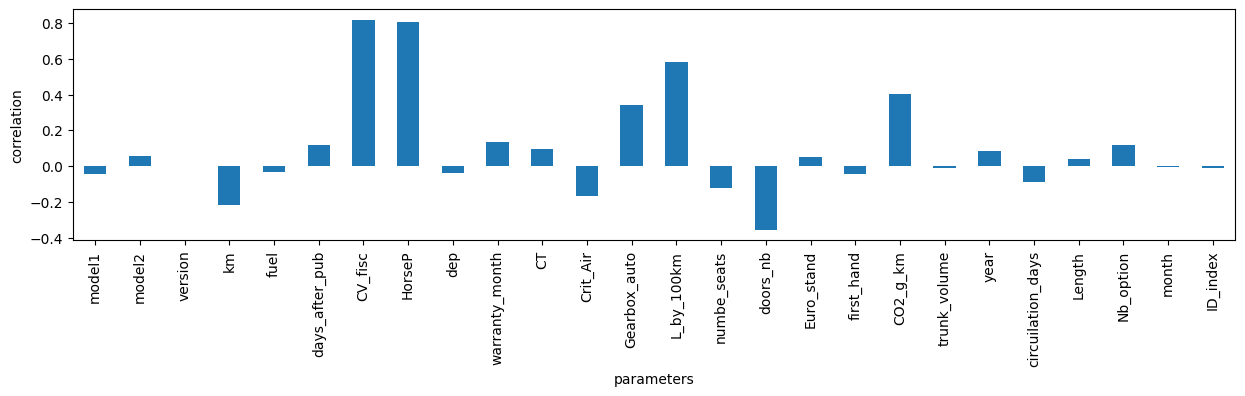

In [73]:
plt.figure(figsize=(15,3))
ax=cor.price.drop('price').plot(kind='bar')
ax.set_ylabel('correlation')
ax.set_xlabel('parameters')
pass

We can see that the correlation between price and model 1 / model 2 and fuel is not very good, this is because the change of model and fuel by number was done randomly and it is not a good idea. Below we will try to replace this columns by numbers but after sorting the price average

**A copy of df3**

In [74]:
df4=df3.copy()
df4['model_version']=df3['model1']+df3['model2']+df3['version']

The below command use SQL to generate a dataframe of model and version sorted with the average price of each one. 
<br>
The finale line shows 4 rows of this dataframe

In [75]:
q="""
SELECT
  model_version,
  AVG(price) AS avg_price
FROM df4
GROUP BY model_version
ORDER BY  avg_price ASC
"""
df_price_by_version=sqldf(q)
df_price_by_version['Id_model_version']=df_price_by_version.index
df_price_by_version.head(4)

,model_version,avg_price,Id_model_version
0,CITROENXSARA PICASSO2.0 HDI SX,1740.000000,0
1,PEUGEOT1071.4 HDI 54 URBAN MOVE 5P,2880.000000,1
2,OPELASTRA 3 BREAKIII BREAK 1.7 CDTI 100 ENJOY,3250.000000,2
3,VOLKSWAGENPOLO 2II (2) 1.0 I FOX,3410.588235,3


The below command use SQL to generate a dataframe of fuel sorted with the average price of each fuel. 
<br>
The finale line shows 4 rows of this dataframe

In [76]:
q="""
SELECT
  fuel,
  AVG(price) AS avg_price
FROM df4
GROUP BY fuel
ORDER BY  avg_price ASC
"""
df_price_by_fuel=sqldf(q)
df_price_by_fuel['Id_fuel']=df_price_by_fuel.index
df_price_by_fuel.head(4)

,fuel,avg_price,Id_fuel
0,Bicarburation essence GNV,20427.872340,0
1,Bicarburation essence GPL,26893.753501,1
2,Diesel,28595.682679,2
3,Essence,38347.297904,3


**Add column to df4 with ID of model_version and fuel**

In [77]:
q="""
SELECT df4.*,df_f.Id_fuel,df_v.Id_model_version
    FROM df4 
JOIN df_price_by_fuel df_f
    ON df4.fuel=df_f.fuel
JOIN df_price_by_version df_v
    ON df4.model_version=df_v.model_version
ORDER BY ID_index
"""
df4_=sqldf(q)

**Plot the diagonal correlation of all df4_ columns**

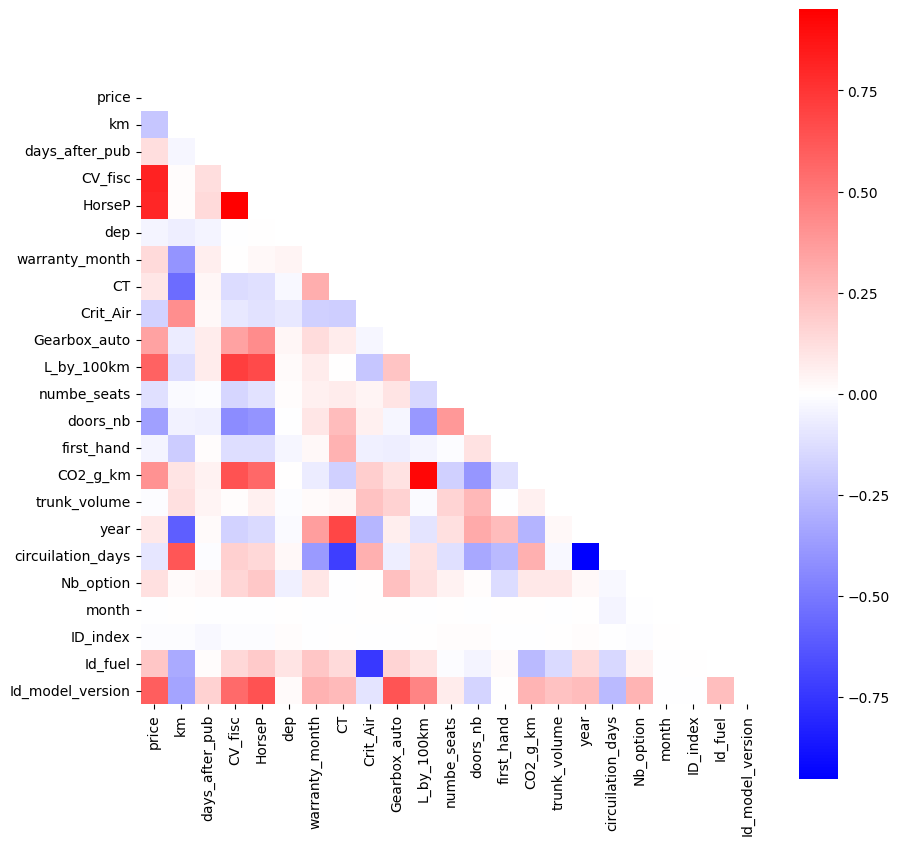

In [78]:
cor2=df4_.corr()

mask = np.triu(np.ones_like(cor2))# this mask allow us to print a half of rectangle

plt.figure(figsize=(10,10))
sns.heatmap(data=cor2,square=True,cmap='bwr', mask=mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
pass

**Plot only the correlation of the price depending on other columns**

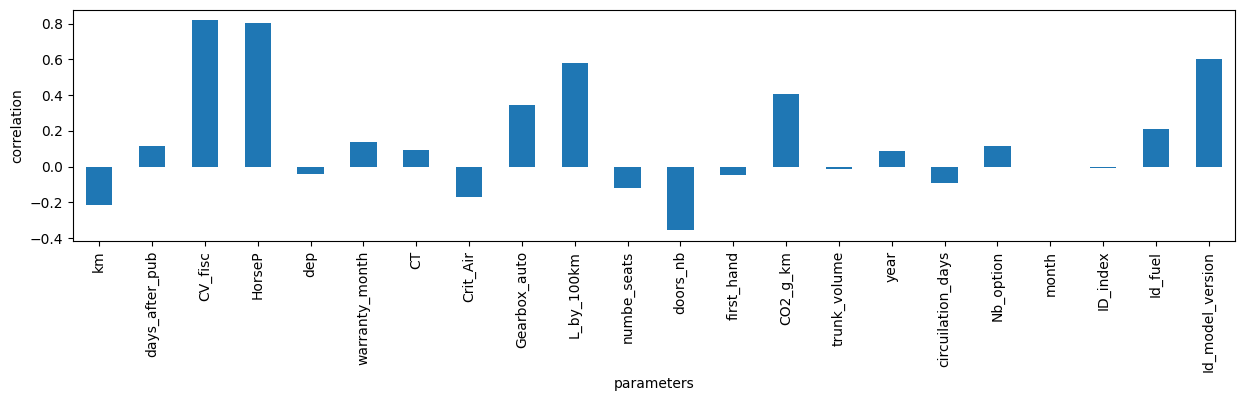

In [79]:
plt.figure(figsize=(15,3))
ax=cor2.price.drop('price').plot(kind='bar')
ax.set_ylabel('correlation')
ax.set_xlabel('parameters')
pass

We can see now that the correlation between price and id-fuel and id_model_version are high that the random way. We will conserve this dataframe for the rest of the project. 

**Plot only columns with price absolut correlation is high than 0.1** 

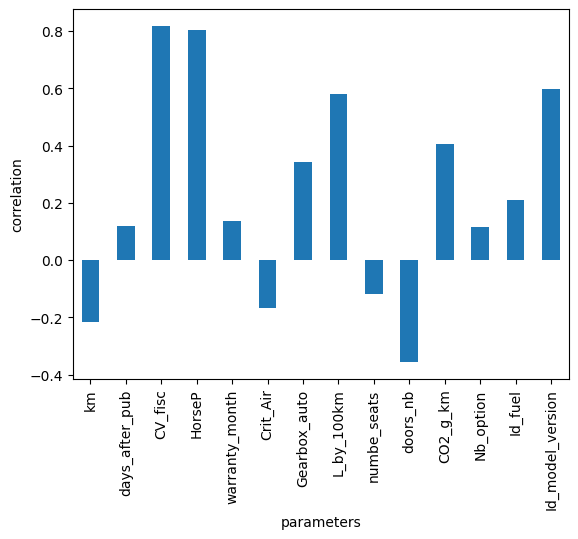

In [80]:
ax=cor2.price[abs(cor2.price)>0.1].drop('price').plot(kind='bar')
ax.set_ylabel('correlation')
ax.set_xlabel('parameters')
pass

**Conserve only columns with price absolut correlation is high than 0.1** 

In [81]:
df5_=df4_[cor2.price[abs(cor2.price)>0.1].index]
df5_.head(3)

,price,km,days_after_pub,CV_fisc,HorseP,warranty_month,Crit_Air,Gearbox_auto,L_by_100km,numbe_seats,doors_nb,CO2_g_km,Nb_option,Id_fuel,Id_model_version
0,16340,47981,60,5.0,100.0,12,1.0,0,NaN,5.0,5.0,NaN,15.0,3,1596
1,16110,104063,23,7.0,132.0,12,1.0,0,4.5,5.0,5.0,119.0,44.0,3,1610
2,17720,108405,27,5.0,99.0,12,2.0,0,3.3,5.0,5.0,90.0,33.0,2,1662


**Save and read again df4,df4_,df5_ in paquet format, this can help if we want to start code from this line**

In [82]:
df4.to_parquet('df4.parquet.gzip',compression='gzip') 
df4_.to_parquet('df4_.parquet.gzip',compression='gzip') 
df5_.to_parquet('df5_.parquet.gzip',compression='gzip') 

# III. Data analysis <a name="title3"></a>

## A. Time distribution <a name="subtitle31"></a>

**Plotting the number of vehicles according to the first circulation year**

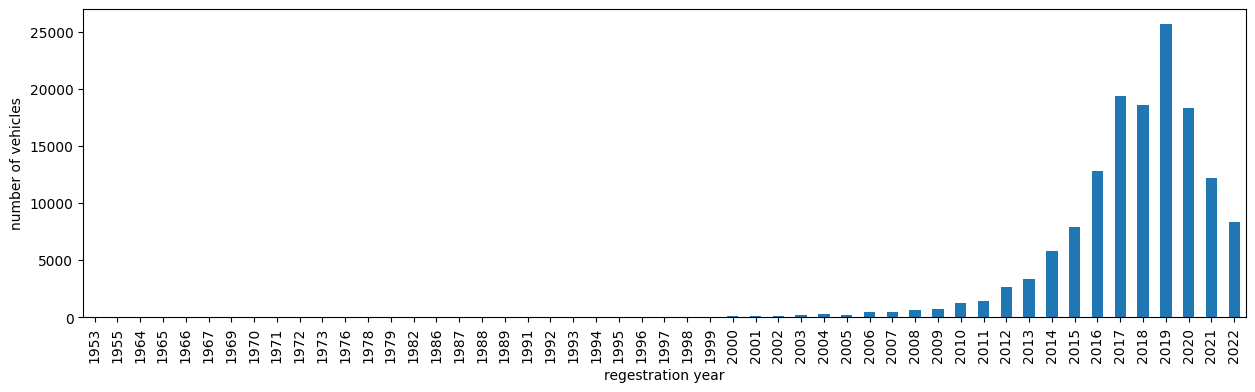

In [83]:
data=df3.year.value_counts().sort_index()
plt.figure(figsize=(15, 4))
ax=data.plot(kind='bar')
ax.set_xlabel('regestration year')
ax.set_ylabel('number of vehicles')
pass

We can see that the maximum number of vehicles was bought in 2019, the people in general keep a vehicle 3 year before the first seel

**Zooming around 2010, 2022**

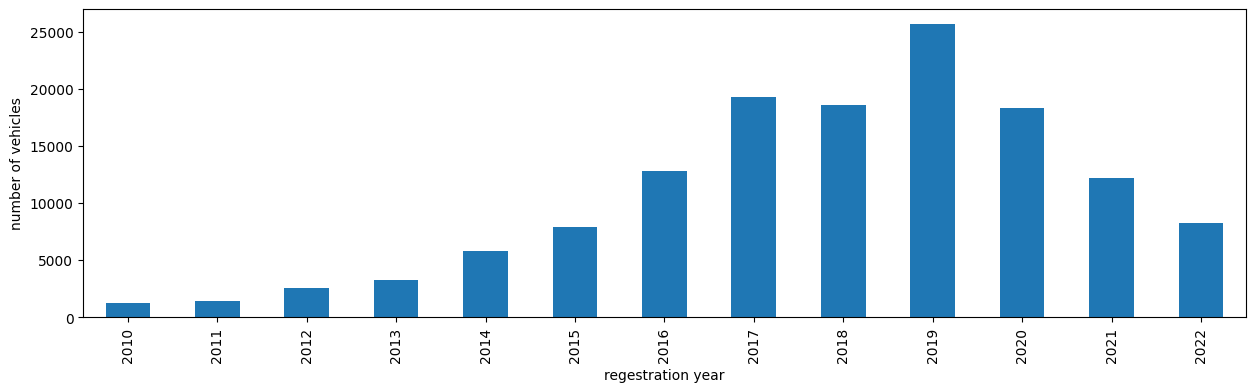

In [84]:
plt.figure(figsize=(15, 4))
ax=data[range(2010,2023)].plot(kind='bar')
ax.set_xlabel('regestration year')
ax.set_ylabel('number of vehicles')
pass


**Plotting the number of vehicles regarding the month of first circulation**

Text(0.5, 0, 'Vehicles number')

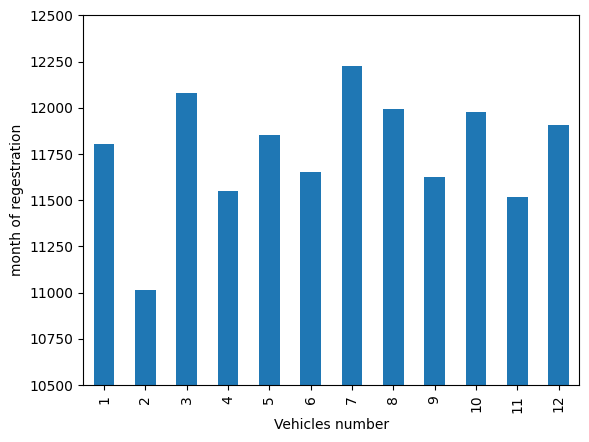

In [85]:
ax=df3.month.value_counts().sort_index().plot(kind='bar')
ax.set_ylim([10500,12500])
ax.set_ylabel('month of regestration')
ax.set_xlabel('Vehicles number')

We can see that the maximum number is in July, this can be explained by the vacation of summer. Also the minimum is in February, and this can be explained by the fact that people didn't move a lot in february (the month after christmas an it's the middle of the winter)

## B. Geographic distribution <a name="subtitle32"></a>

**Number of vehicles in each departement**

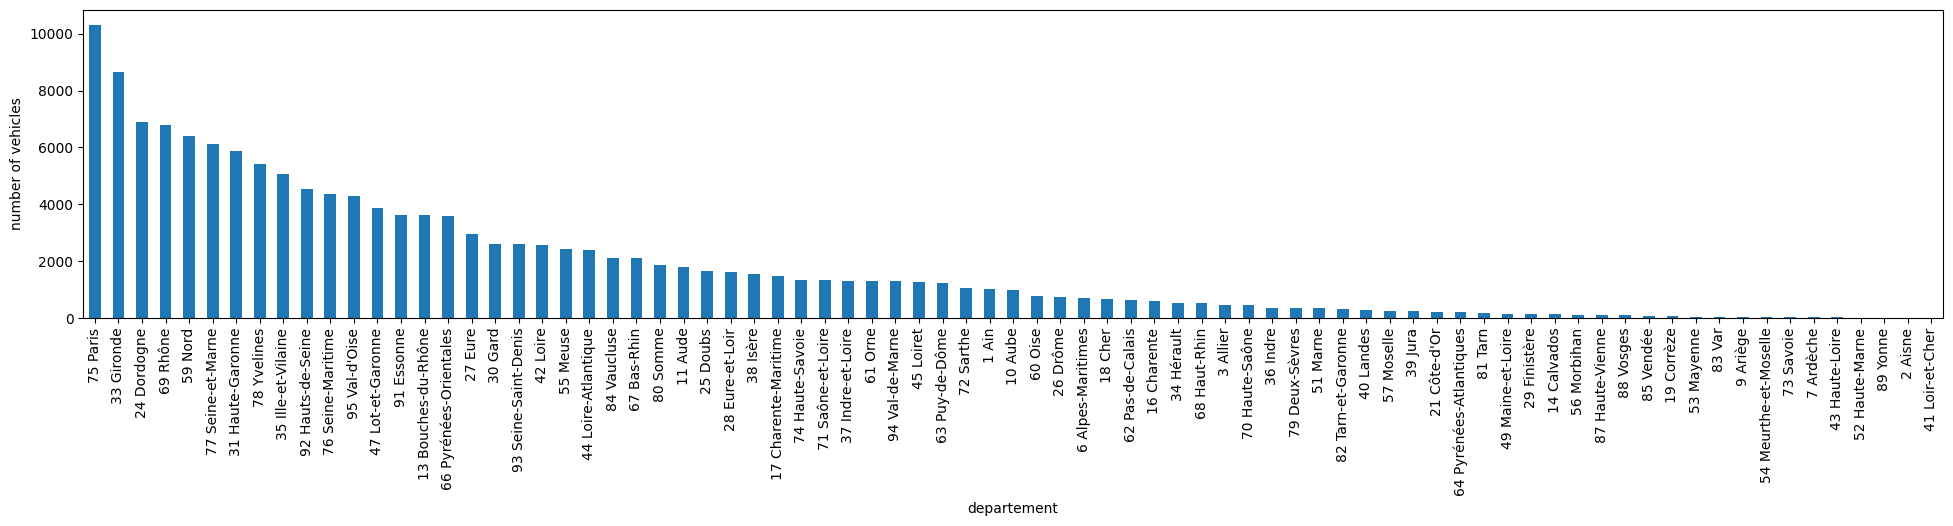

In [86]:
data=df3.dep_name.value_counts()
plt.figure(figsize=(24, 4))
ax=data.plot(kind='bar')
ax.set_xlabel('departement')
ax.set_ylabel('number of vehicles')
pass

**zoom around 10 most dense department**

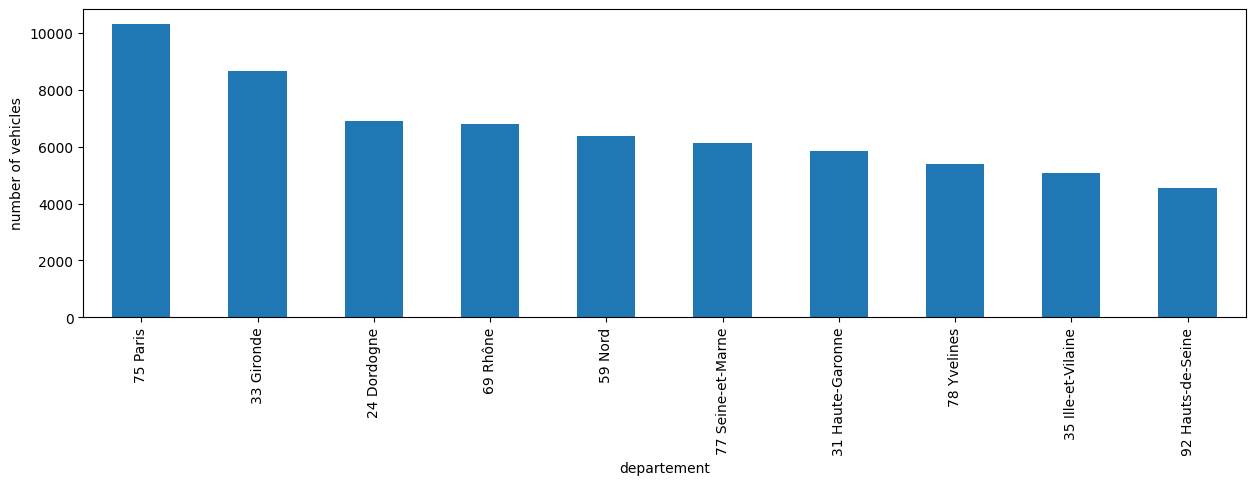

In [87]:
plt.figure(figsize=(15, 4))
ax=data[range(0,10)].plot(kind='bar')
ax.set_xlabel('departement')
ax.set_ylabel('number of vehicles')
pass

Paris is the most dense departement, this is coherent since Paris in the capital and the biggest city of France

### Plot data in a departments map of France

Load the geographical department dataset
<br> 
you can donwload this file using the below link
<br>
https://github.com/gregoiredavid/france-geojson/blob/master/departements-version-simplifiee.geojson

In [88]:
sf = gpd.read_file('departements-version-simplifiee.geojson')
sf.head(3)

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."


Replace the departments 2A/2B (Corse) with 200/201: this allows us to convert the department number to integer

In [89]:
sf.code[sf.code=='2A']='200'
sf.code[sf.code=='2B']='201'
sf.code=sf.code.astype('Int16')

**Add a column 'col_1' to 'sf' and fill it with the nember of vehicles in each department**

In [90]:
sf['col_1']=[0]*len(sf) # add a new column to sf 

dep_count=df3.dep.value_counts() # calculate the number of vehicles in each department 

for i in range (len(sf)):
    try:
        sf.col_1[i]=dep_count[dep_count.index==int(sf.code[i])].values[0]
    except:pass

**Show some rows of sf after the update**

In [91]:
sf.head(3)

,code,nom,geometry,col_1
0,1,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",1010
1,2,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",12
2,3,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",450


**Plot the departemental map of France**

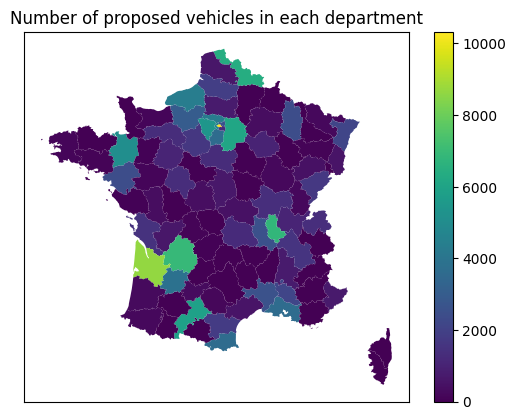

In [92]:
ax=sf.plot(column='col_1', legend=True)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title('Number of proposed vehicles in each department')
pass

We can see the same distribution (Paris is the densest departement),but with more visibility 

### Plot data in a regions map of France
**Do the same thing but with regions instead of departments**
<br> 
Load the geographical regions dataset and show some rows
<br> 
you can donwload this file using the below link
<br>
https://github.com/gregoiredavid/france-geojson/blob/master/regions-version-simplifiee.geojson

In [93]:
sfr = gpd.read_file('regions-version-simplifiee.geojson')
sfr.head(3)

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.63327 49.10838, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.88845 47.50943, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.57569 46.74952, ..."


**Add the region of each vehicles to the df3**

In [94]:
df3.ID_index=df3.index
q="""
SELECT df3.*,dep_name.region_name
    FROM df3
LEFT JOIN dep_name
    ON df3.dep=dep_name.num_dep
ORDER BY 
    df3.ID_index
"""

df3_region=sqldf(q)

Add a column to region dataframe, this will used to calculate the number of vehicles in each region

In [95]:
sfr['col_1']=[0]*len(sfr)

Count vehicles by region

In [96]:
reg_count=df3_region.region_name.value_counts()

Add number of verhicles to the regiosn datafram

In [97]:
for i in range (len(sfr)):
    try: 
        sfr.col_1[i]=reg_count[reg_count.index==sfr.nom[i]].values[0]
    except:pass

**Plot the region map with number of vehicles in each region**

Text(0.5, 1.0, 'Number of proposed vehicles in each region')

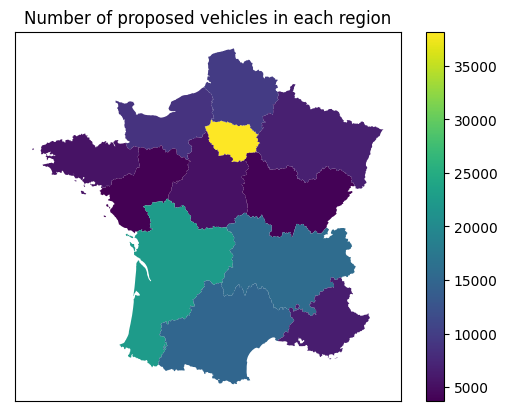

In [98]:
ax=sfr[:-1].plot(column='col_1', legend=True)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title('Number of proposed vehicles in each region')

We can see that 'Île-de-France' (Paris region) is the most densest region 

### Evolution of market part of each fuel for the second hand vehicle in France 

**Making a database of vehicle number by year and by fuel type**

In [99]:
carb_year_df=pd.DataFrame(columns=list(set(df3.fuel)),index=range(2011,2023))
for fuel in carb_year_df.columns:
    carb_year_df[fuel]=df3[df3.fuel==fuel].year.value_counts().sort_index()
carb_year_df=carb_year_df.fillna(0)
carb_year_df.head(4)

,Bicarburation essence GPL,Bicarburation essence GNV,Hybride diesel électrique,Bicarburation essence bioéthanol,Electrique,Hybride essence électrique,Diesel,Essence
2011,0.0,0.0,12,11.0,0.0,19,776,628
2012,0.0,0.0,9,0.0,9.0,13,1585,989
2013,0.0,0.0,24,11.0,9.0,35,1768,1468
2014,8.0,0.0,10,0.0,18.0,73,3521,2155


**pLoting the number of vehicle by year and by fuel type**

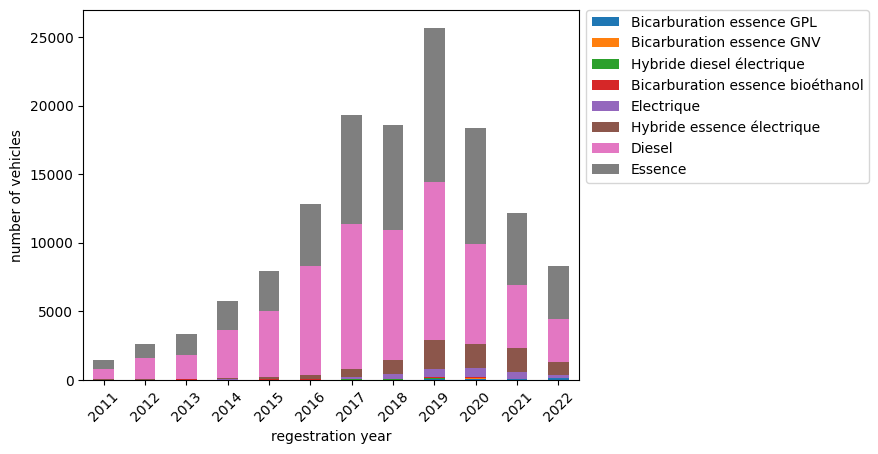

In [100]:
ax = carb_year_df.plot( y=carb_year_df.columns, kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=45)
ax.set_xlabel('regestration year')
ax.set_ylabel('number of vehicles')
pass

**Plotting the percentage of each fuel by years**

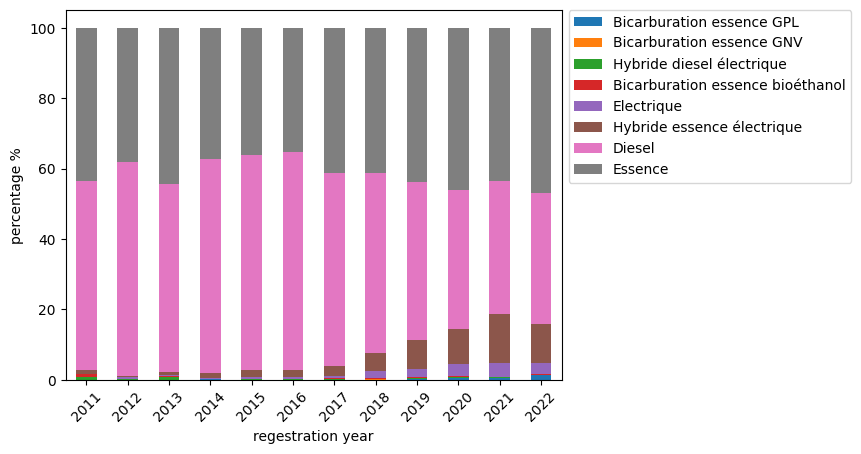

In [101]:
carb_year_dfn=100*carb_year_df.divide((carb_year_df.sum(axis=1)+1e-6),axis=0)
ax = carb_year_dfn.plot( y=carb_year_df.columns, kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=45)
ax.set_xlabel('regestration year')
ax.set_ylabel('percentage %')
pass

We can see that diesel fuel was started to decrease since 2015 & 2016
<br>
This remark can be explained by the first time of diesel ban on Paris made by France in 2016, see the link below:
<br>
https://fr.wikipedia.org/wiki/%C3%89limination_progressive_des_v%C3%A9hicules_%C3%A0_combustion

**Making a database of vehicle number by department and by fuel type**

In [102]:
carb_dep_df=pd.DataFrame(columns=list(set(df3.fuel)),index=list(set(df3.dep)))
for fuel in carb_dep_df.columns:
    carb_dep_df[fuel]=df3[df3.fuel==fuel].dep.value_counts()
carb_dep_df=carb_dep_df.fillna(0)
        
carb_dep_df.head(3)

,Bicarburation essence GPL,Bicarburation essence GNV,Hybride diesel électrique,Bicarburation essence bioéthanol,Electrique,Hybride essence électrique,Diesel,Essence
1,0.0,0.0,0.0,0.0,7.0,70.0,755.0,178.0
2,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0
3,0.0,10.0,0.0,0.0,14.0,0.0,244.0,182.0


**calculate the total, this will help to sort the data**

In [103]:
carb_dep_df['tot']=carb_dep_df.sum(axis=1)

In [104]:
carb_dep_df=carb_dep_df.sort_values(by='tot',ascending=True)
carb_dep_df.head(3)

,Bicarburation essence GPL,Bicarburation essence GNV,Hybride diesel électrique,Bicarburation essence bioéthanol,Electrique,Hybride essence électrique,Diesel,Essence,tot
41,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,12.0
52,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,16.0


**drop the total column**

In [105]:
carb_dep_df=carb_dep_df.drop(columns='tot')

**Ploting the data**

<Figure size 1500x400 with 0 Axes>

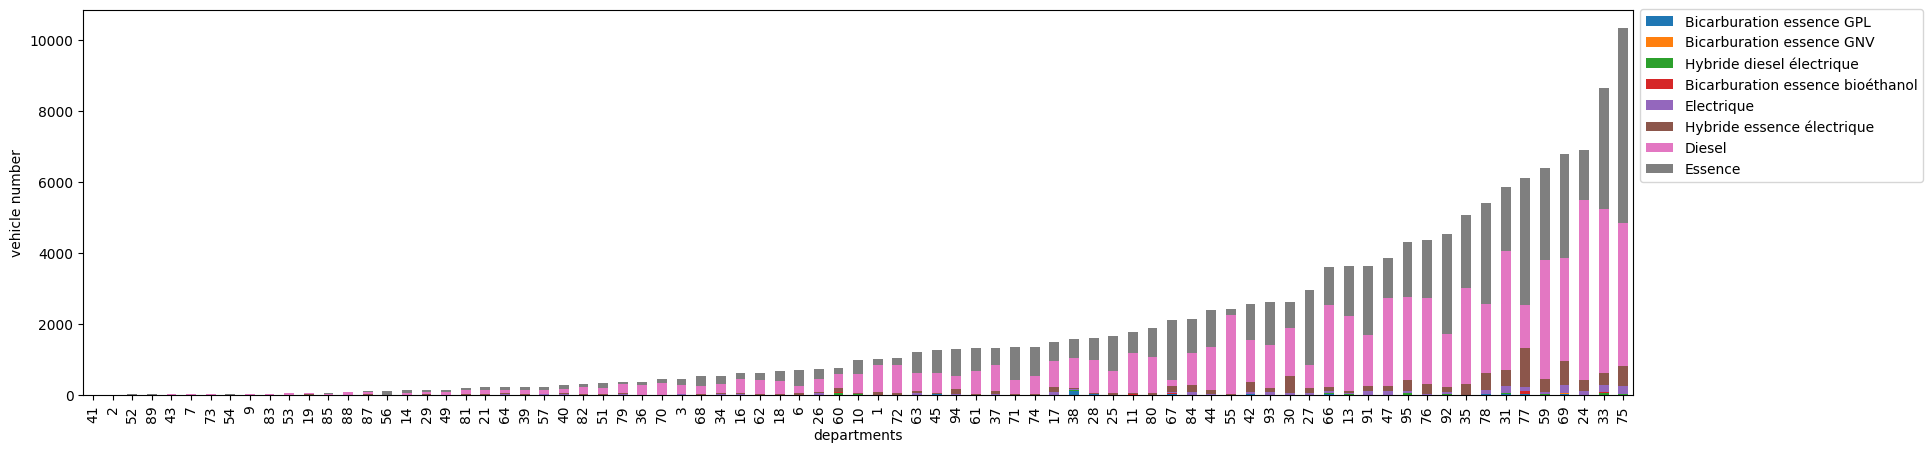

In [106]:
plt.figure(figsize=(15, 4))
ax = carb_dep_df.plot( y=carb_dep_df.columns, kind="bar", rot=0, stacked=True,figsize=(20, 5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xticks(rotation=90)
ax.set_xlabel('departments')
ax.set_ylabel('vehicle number')
pass

**Zooming on the most 10 densest departments**

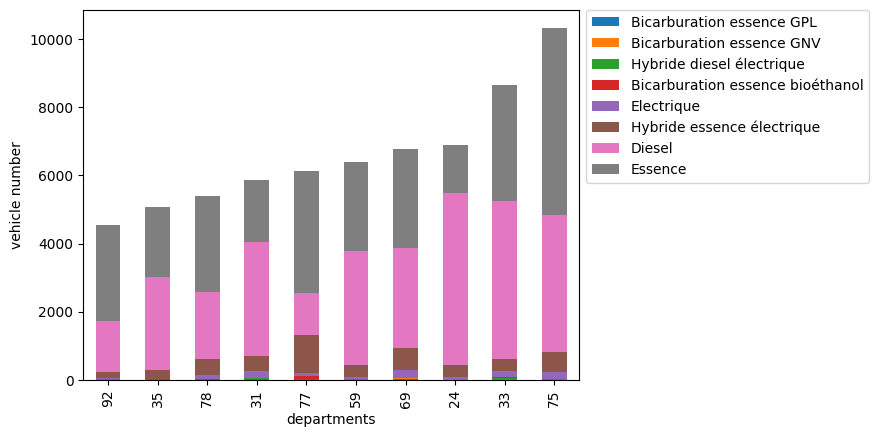

In [107]:
ax = carb_dep_df.tail(10).plot( y=carb_dep_df.columns, kind="bar", rot=0, stacked=True)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xlabel('departments')
ax.set_ylabel('vehicle number')
plt.xticks(rotation=90)
pass

**Ploting the porcentage of each feul in each departement**

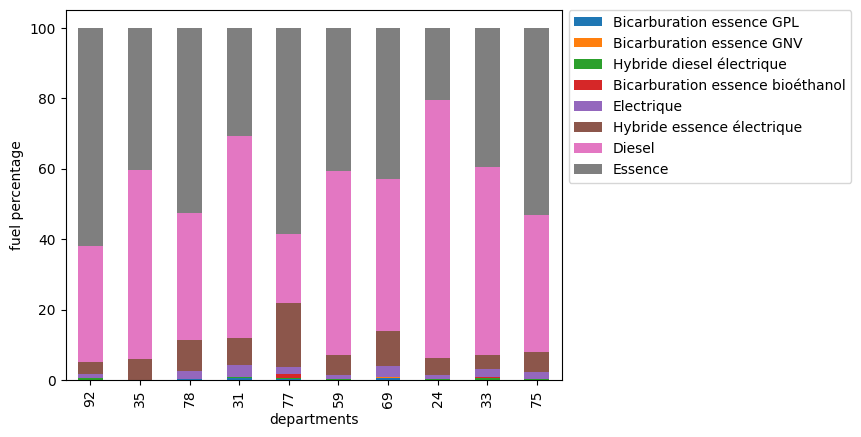

In [108]:
carb_dep_dfn=100*carb_dep_df.tail(10).divide((carb_dep_df.tail(10).sum(axis=1)+1e-6),axis=0)
ax = carb_dep_dfn.plot( y=carb_dep_dfn.columns, kind="bar", rot=0, stacked=True)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xlabel('departments')
ax.set_ylabel('fuel percentage')
plt.xticks(rotation=90)
pass

We can see that Paris has more essence vehicle than diesel, this is because Paris will ban diesel vehicles in 2024 and essence in 2030

## C. Outliers in data <a name="subtitle33"></a>

**Plot outliers of price**

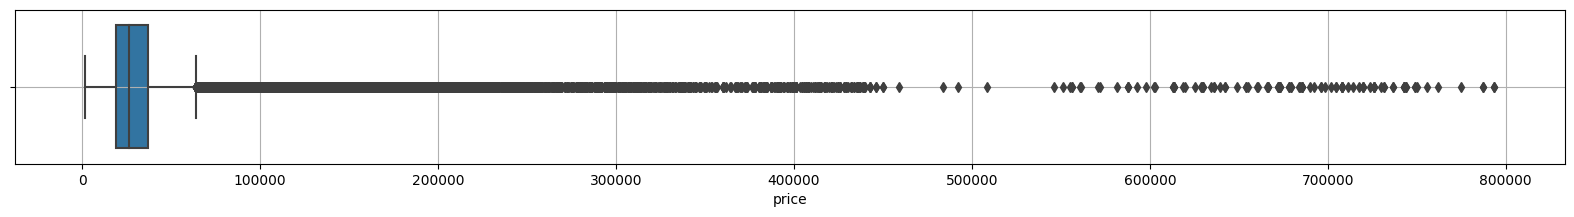

In [109]:
plt.figure(figsize=(20, 2))
sns.boxplot(x=df3.price)
plt.grid()
pass

**Calculation of the upper/lower limits**

In [110]:
#df3.price.quantile([0.25,0.5,0.75])
Q1 = df3.price.quantile(0.25)
Q3 = df3.price.quantile(0.75)  
IQR = Q3 - Q1
lower_lim=max(Q1 - 1.5 * IQR,0) # price can't be negative
upper_lim=Q3 + 1.5 * IQR
print ('lower_lim',lower_lim,'upper_lim',upper_lim)

lower_lim 0 upper_lim 64060.0


**Zoom around upper and lower limits**

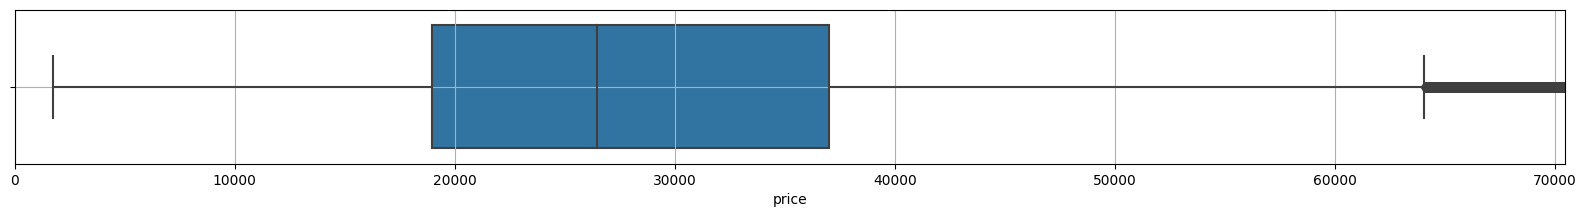

In [111]:
plt.figure(figsize=(20, 2))
sns.boxplot(x=df3.price)
plt.grid()
plt.xlim([lower_lim,upper_lim*1.1])
pass

**filter juste vehicles with price inside of [lower_lim,upper_lim]**

In [112]:
df5_price=df5_[df5_.price < upper_lim]

**Save dataframe with filtered vehicles**

In [113]:
df5_price.to_parquet('df5_price.parquet.gzip',compression='gzip') 

**Just for information: Plot outliers of each fuel**

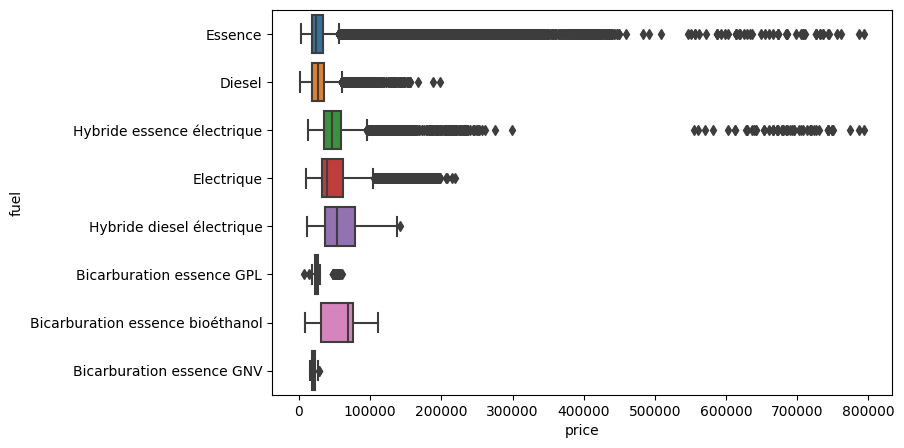

In [114]:
plt.figure(figsize=(8, 5))
ax=sns.boxplot(data=df3, x="price", y="fuel")

**Plot the price distribution**

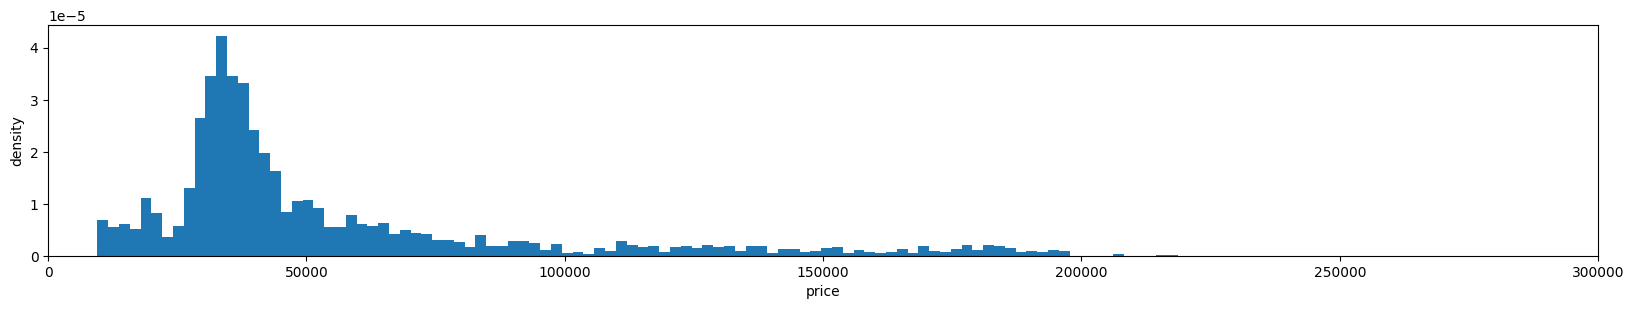

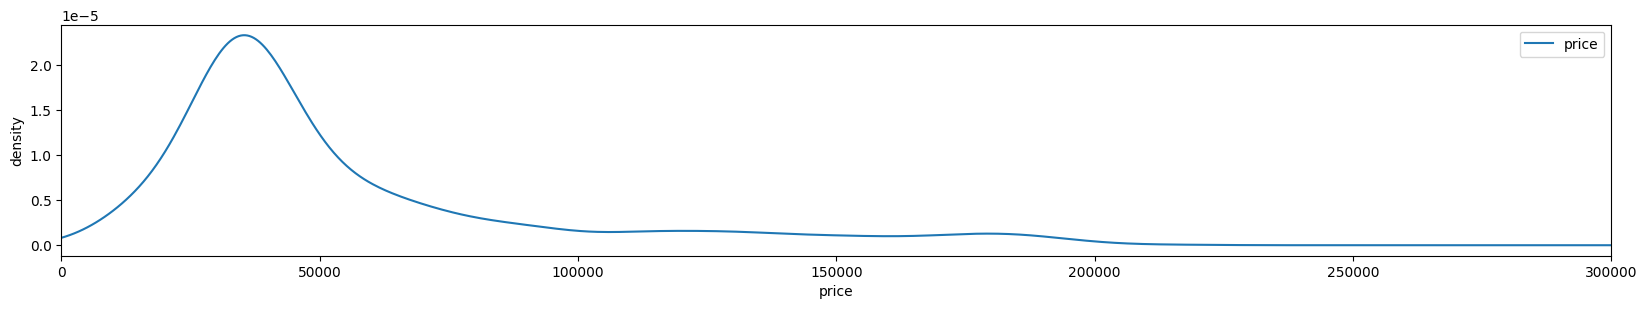

In [115]:
plt.figure(figsize=(20,3))
plt.hist(df3[df3.fuel=='Electrique'].price,bins=100,density=True)
plt.xlim([0,300000])
plt.xlabel('price')
plt.ylabel('density')
ax=df3[df3.fuel=='Electrique'].plot(y='price',kind='kde',figsize=(20,3))
ax.set_xlim([0,300000])
ax.set_xlabel('price')
ax.set_ylabel('density')
pass

**Zoom around [lower_lim,upper_lim]**

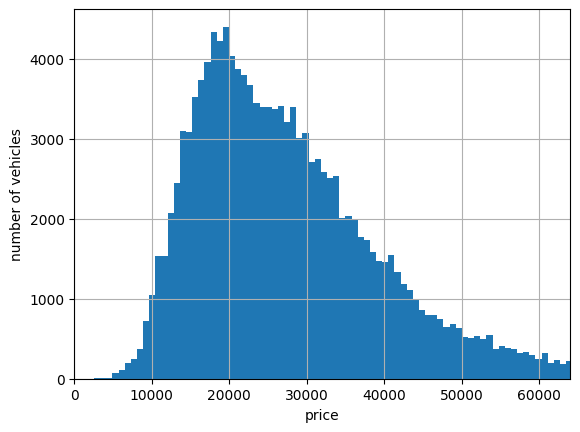

In [116]:
plt.hist(df3.price,bins=1000)
plt.xlim([lower_lim,upper_lim])
plt.grid()
plt.xlabel('price')
plt.ylabel('number of vehicles')
pass

# IV. Price estimation <a name="title4"></a>

## A. Train/dev/test set preparation <a name="subtitle41"></a>

**Using df5_price to get train/dev/test distribution**

In [117]:
########### Input data
X=df5_price.drop(columns='price')
########### Normalization of input data
X_mean=X.mean()
X_std=X.std()
X=X-X_mean
X=X/X_std
########### Output data
Y=df5_price[['price']]

**Replacing input NAN data bay 0:** <br> 0 in the mean value of normalized input

In [118]:
X=X.fillna(0)

There is non NAN values in output

In [119]:
Y.isnull().value_counts()

price
False    130784
dtype: int64

**Split data between train and test data**

In [120]:
X_train_df,X_test_df,y_train_df,y_test_df=sklearn.model_selection.train_test_split(X,\
                                Y, test_size=0.1, random_state=0, shuffle=True)

**Convert dataframe to numpy array**
<br> X_train_index,X_test_index will help to identify each row, because train_test_split mexts randemly the data

In [121]:
X_train_index,X_test_index=X_train_df.index,X_test_df.index
X_train,X_test,y_train,y_test=X_train_df.values,X_test_df.values,y_train_df.values,y_test_df.values

**Split test data between dev-set and test-set data**

In [122]:
n=len(X_test)
X_dev,y_dev=X_test[:n//2],y_test[:n//2]
X_test,y_test=X_test[n//2:],y_test[n//2:]

## B. Price estimation, linear & polynomial regression <a name="subtitle42"></a>

### Linear regression model

**Model fitting with training data**

In [123]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

**Pridect the output of train and test set**

In [124]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

**Definition of the pourcentage error function**

In [125]:
def NRMSE(y_true, y_pred):
    return RMSE(y_true, y_pred, squared=False)/y_true.mean() #squared = False returns RMSE value.
    #return 100*sum(abs(y1-y2))/(sum(abs(y1))+sum(abs(y2)))

**Error calculation of the train and test set**

In [126]:
print("erreur train ",100*NRMSE(y_train,y_train_pred),"% erreur test",100*NRMSE(y_test,y_test_pred),"%")

erreur train  11.969153916876218 % erreur test 11.94188029594655 %


### Polynomial regression model

**Polynomial model with degree = 2**

In [127]:
# Create linear regression object
poly = PolynomialFeatures(degree=2, include_bias=True)
# transformation of data
X_train_t = poly.fit_transform(X_train)
X_test_t = poly.fit_transform(X_test)
# model fitting 
model = linear_model.LinearRegression()
model.fit(X_train_t, y_train)
pass
# model score
print('model score', model.score(X_train_t, y_train))

model score 0.9499406487403036


**Prediction of output and error calculation**

In [128]:
y_test_pred=model.predict(X_test_t)
y_train_pred=model.predict(X_train_t)
print("erreur train",100*NRMSE(y_train,y_train_pred)," % erreur test",100*NRMSE(y_test,y_test_pred),"%")

erreur train 9.404518230081994  % erreur test 9.440469720956916 %


With degree = 2 the error was decreased from 11.2% to 9.4% 

**Impact of polynome degree to the model prediction capability**

We must be careful when using the polynomial features. The formula for calculating the number of the polynomial features is N(n,d)=C(n+d,d) where n is the number of the features, d is the degree of the polynomial, C is binomial coefficient(combination)
<br>
*shape of X_train:*

In [129]:
l,n=X_train.shape
print(X_train.shape)

(117705, 14)


*Estimation of the transformed X_train size with each degree*

In [130]:
for d in range (1,10): # d is the degree 
    n_trans=np.math.comb(n+d,d) # the number of the polynomial features
    disk_size=int(l*n_trans*64/(1024*1024)) # size of X_tran, 64 = float64, 1MB=1024*1024 B 
    print ('Degree',d,'X_transform shape',l,n_trans,'estimated size of X_transform',disk_size,'MB')

Degree 1 X_transform shape 117705 15 estimated size of X_transform 107 MB
Degree 2 X_transform shape 117705 120 estimated size of X_transform 862 MB
Degree 3 X_transform shape 117705 680 estimated size of X_transform 4885 MB
Degree 4 X_transform shape 117705 3060 estimated size of X_transform 21983 MB
Degree 5 X_transform shape 117705 11628 estimated size of X_transform 83537 MB
Degree 6 X_transform shape 117705 38760 estimated size of X_transform 278457 MB
Degree 7 X_transform shape 117705 116280 estimated size of X_transform 835372 MB
Degree 8 X_transform shape 117705 319770 estimated size of X_transform 2297273 MB
Degree 9 X_transform shape 117705 817190 estimated size of X_transform 5870809 MB


As we can see above, since degree = 4 the size of X_transform is hiouge
<br>
because this problem, we propose to do check the degree impact only by 5000 values of train set
Below, we will use a for loop to calculate the train/test error of multiple degrees

Degree 1 erreur train 11.806025682257644 erreur test 11.980456839455153 X_trans_sahpe (5000, 15)
Degree 2 erreur train 9.239430374959772 erreur test 9.611686427797764 X_trans_sahpe (5000, 120)
Degree 3 erreur train 7.231314729853356 erreur test 10.448349213660125 X_trans_sahpe (5000, 680)


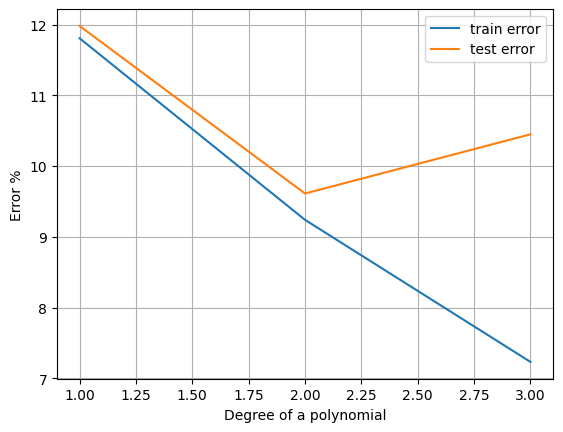

In [131]:
e_train=[]
e_test=[]
pol_or=[]

#Check the degree impact only by 5000 
X_train2=X_train[0:5000]
X_test2=X_test[0:5000]
y_train2=y_train[0:5000]
y_test2=y_test[0:5000]

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    
    X_train_t = poly.fit_transform(X_train2)
    X_test_t = poly.fit_transform(X_test2)
    
    model = linear_model.LinearRegression()
    model.fit(X_train_t, y_train2)

    y_test_pred=model.predict(X_test_t)
    y_train_pred=model.predict(X_train_t)
    
    train_err=100*NRMSE(y_train2,y_train_pred)
    test_err=100*NRMSE(y_test2,y_test_pred)
    print("Degree",i,"erreur train",train_err,"erreur test",test_err,'X_trans_sahpe',X_train_t.shape)
    
    e_train.append(train_err)
    e_test.append(test_err)
    pol_or.append(i)

plt.plot(pol_or,e_train,label='train error')
plt.plot(pol_or,e_test,label='test error')
plt.grid()
plt.xlabel('Degree of a polynomial')
plt.ylabel('Error %')
plt.legend()
pass

The optimum degree is 2, with a degree > 2, the model overfit the train set, and generate a high variant 

**Plot some predect and real y_test**

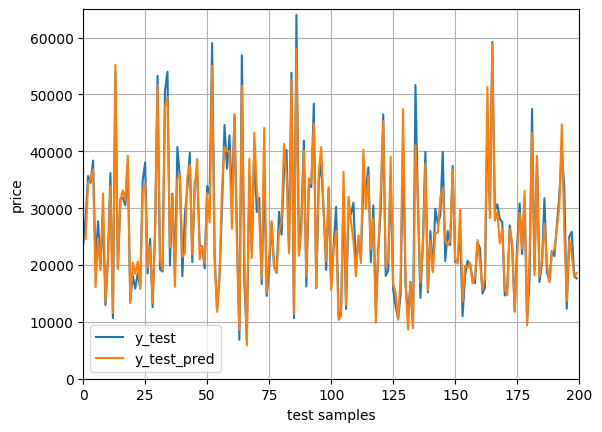

In [132]:
mask=range(0,200)
plt.plot(y_test[mask],label='y_test')
plt.plot(y_test_pred[mask],label='y_test_pred')
plt.grid()
plt.legend()
plt.xlabel('test samples')
plt.ylabel('price')
plt.ylim([0,65000])
plt.xlim([0,200])
pass

## C. Price estimation, Neural Network <a name="subtitle43"></a>

**Building a neural network model with 3 'relu' hidden layer**

In [133]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(None, X_train.shape[1])))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))#'linear'
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary() # print de summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 8)           120       
                                                                 
 dense_1 (Dense)             (None, None, 6)           54        
                                                                 
 dense_2 (Dense)             (None, None, 4)           28        
                                                                 
 dense_3 (Dense)             (None, None, 1)           5         
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


I tried a leakage relu as activation finction but train/dev error was close to 3%
batch size didn't change a lot the error: 32, 64, 128
adding two layer with 8 neural in each one didn't chnage the error also
epoche = 100
train error (Bias) [2.95648322]
dev error (Variance) [2.95436081]
test error (data mismatch) [2.98441222]
epoche = 1000
train error (Bias) [2.90344986]
dev error (Variance) [2.89631184]
test error (data mismatch) [2.92974019]

In [134]:
history = model.fit(x=X_train, y=y_train, epochs=100,batch_size=64, 
                   validation_data=(X_dev, y_dev), verbose=0)
pass

**Make a beep after finishing the fit of the model**

In [135]:
import winsound
winsound.Beep(500, 1000)

**Predict the output of train/dev/test set**

In [136]:
y_train_pred=model.predict(X_train)
y_dev_pred=model.predict(X_dev)
y_test_pred=model.predict(X_test)

205/205 [==============================] - 1s 3ms/step


**Print the error of each data set**

In [137]:
print("train error (Bias) % ",100*NRMSE(y_train,y_train_pred))
print("dev error (Variance) % ",100*NRMSE(y_dev,y_dev_pred))
print("test error (data mismatch) % ",100*NRMSE(y_test,y_test_pred))

train error (Bias) %  8.002405850854059
dev error (Variance) %  8.02262753858008
test error (data mismatch) %  8.01701190045707


**Plot some predect and real y_test**

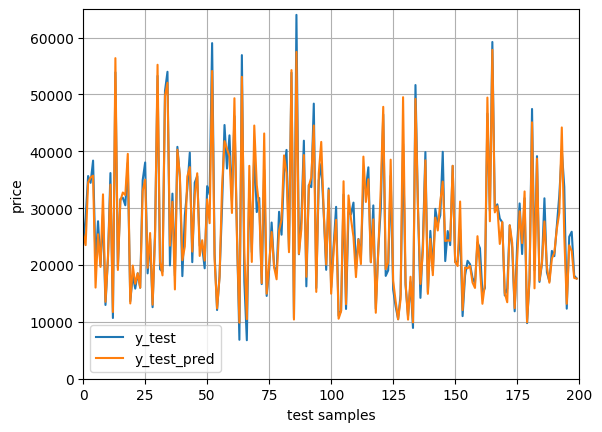

In [138]:
mask=range(0,200)
plt.plot(y_test[mask],label='y_test')
plt.plot(y_test_pred[mask],label='y_test_pred')
plt.grid()
plt.legend()
plt.xlabel('test samples')
plt.ylabel('price')
plt.ylim([0,65000])
plt.xlim([0,200])
pass

**Save the model**

In [139]:
model.save('price_nn_model.h5')

**Read model**

In [140]:
model = keras.models.load_model('price_nn_model.h5')

### Predict the price of my car

In [141]:
Id_model_version=df_price_by_version[df_price_by_version.model_version==\
        'VOLKSWAGENPOLO 5V 1.2 TDI 75 FAP TRENDLINE 3P'].Id_model_version
Id_fuel=df_price_by_fuel[df_price_by_fuel.fuel=='Diesel'].Id_fuel.values[0]

In [142]:
mycar=pd.DataFrame({ 'km':130070, 'days_after_pub':15, 'CV_fisc':4, 'HorseP':75, 'warranty_month':0,
       'Crit_Air':2.0, 'Gearbox_auto':0, 'L_by_100km':4.2, 'numbe_seats':5, 'doors_nb':3,
       'CO2_g_km':99, 'Nb_option':0, 'Id_fuel':Id_fuel, 'Id_model_version':Id_model_version})
mycar

,km,days_after_pub,CV_fisc,HorseP,warranty_month,Crit_Air,Gearbox_auto,L_by_100km,numbe_seats,doors_nb,CO2_g_km,Nb_option,Id_fuel,Id_model_version
159,130070,15,4,75,0,2.0,0,4.2,5,3,99,0,2,159


In [143]:
myX=mycar
myX=myX-X_mean
myX=myX/X_std

In [144]:
price_of_my_car=model.predict(myX)

1/1 [==============================] - 0s 216ms/step


In [145]:
price_of_my_car[0][0]

9747.853

I sold my old car by a price of 5300 euros, and I know that this car costs at maximum 7000 euros, but not 9202 euros. I think the model can be improved to predict more accurately the car price, and I think that the high error of predicting my car price is also becuase the rarity of VW model relatively to France model like Renault, Ciroin ... 

**Load of different dataframes of this projects**
<br> we can use this line if we want skep data preparation steps

In [ ]:
df3=pd.read_parquet('df3.parquet.gzip')
df3_=pd.read_parquet('df3_.parquet.gzip')
df5_price=pd.read_parquet('df5_price.parquet.gzip')
df5_=pd.read_parquet('df5_.parquet.gzip')
df4=pd.read_parquet('df4.parquet.gzip')

\
you can download all this datasets in the link below 
\
\
https://github.com/bouz1/Manipulation_of_second_hand_vehicles_data/tree/main/datasets